In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("C:/Users/rosha/Desktop/Myntra sales analysis/Myntra dataset.csv")
df

,Order ID,Customer ID,Product ID,Date,Original Price,Discount%
0,OD0001,C001,P0001,25-09-2022,349.0,30.00%
1,OD0002,C002,P0001,25-08-2021,350.0,30.00%
2,OD0003,C003,P0001,25-07-2021,351.0,30.00%
3,OD0004,C004,P0001,25-01-2022,352.0,25.00%
4,OD0005,C005,P0001,14-04-2021,353.0,25.00%
...,...,...,...,...,...,...
3495,OD3496,C081,P3071,28-04-2021,1207.0,50.00%
3496,OD3497,C082,P3071,05-06-2021,1215.0,50.00%
3497,OD3498,C083,P3071,30-03-2022,1189.0,50.00%
3498,OD3499,C084,P3071,03-01-2022,1182.0,50.00%


In [4]:
df.head()


,Order ID,Customer ID,Product ID,Date,Original Price,Discount%
0,OD0001,C001,P0001,25-09-2022,349.0,30.00%
1,OD0002,C002,P0001,25-08-2021,350.0,30.00%
2,OD0003,C003,P0001,25-07-2021,351.0,30.00%
3,OD0004,C004,P0001,25-01-2022,352.0,25.00%
4,OD0005,C005,P0001,14-04-2021,353.0,25.00%


## replace blanks with 0 as tenure is 0 and no total charges are recorded

In [8]:
df["TotalCharges"]=df["TotalCharges"].replace(" ","0")
df["TotalCharges"]=df["TotalCharges"].astype("float")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [14]:

# Data Cleaning & Preprocessing
#df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')  # Convert Date column
#df['Discount%'] = df['Discount%'].str.replace('%', '').astype(float) / 100  # Convert Discount% to numeric

# Compute final price after discount
df['Final Price'] = df['Original Price'] * (1 - df['Discount%'])


In [15]:
df.describe()

,Date,Original Price,Discount%,Final Price
count,3500,3500.000000,3500.000000,3500.000000
mean,2022-02-15 11:15:09.257142784,839.630857,0.355146,537.927126
min,2021-01-01 00:00:00,123.000000,0.100000,81.840000
25%,2021-07-22 00:00:00,456.000000,0.300000,274.650000
50%,2022-02-12 00:00:00,635.500000,0.350000,399.270000
75%,2022-09-13 00:00:00,1119.000000,0.420000,689.500000
max,2023-03-31 00:00:00,22365.000000,0.550000,16773.750000
std,NaN,685.384738,0.100804,462.727656


In [16]:


# Summary Statistics
print("Data Summary:")
print(df.describe(include='all'))



Data Summary:
       Order ID Customer ID Product ID                           Date  \
count      3500        3500       3500                           3500   
unique     3500         100       3071                            NaN   
top      OD3500        C099      P3071                            NaN   
freq          1          42         10                            NaN   
mean        NaN         NaN        NaN  2022-02-15 11:15:09.257142784   
min         NaN         NaN        NaN            2021-01-01 00:00:00   
25%         NaN         NaN        NaN            2021-07-22 00:00:00   
50%         NaN         NaN        NaN            2022-02-12 00:00:00   
75%         NaN         NaN        NaN            2022-09-13 00:00:00   
max         NaN         NaN        NaN            2023-03-31 00:00:00   
std         NaN         NaN        NaN                            NaN   

        Original Price    Discount%   Final Price  
count      3500.000000  3500.000000   3500.000000  
uniqu

In [18]:


# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())







Missing Values:
Order ID          0
Customer ID       0
Product ID        0
Date              0
Original Price    0
Discount%         0
Final Price       0
YearMonth         0
dtype: int64


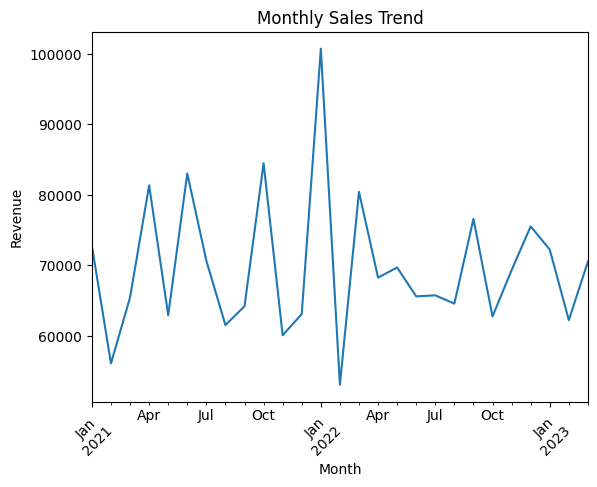

In [20]:
# Sales Trend Over Time
df['YearMonth'] = df['Date'].dt.to_period('M')
sales_trend = df.groupby('YearMonth')['Final Price'].sum()
sales_trend.plot(kind='line', title='Monthly Sales Trend', xlabel='Month', ylabel='Revenue')
plt.xticks(rotation=45)
plt.show()

## converted 0 and 1 for senior citizzen as yes or no to understand easier  

In [23]:
# Top 5 Customers by Spending
top_customers = df.groupby('Customer ID')['Final Price'].sum().sort_values(ascending=False).head(5)
print("\nTop 5 Customers:")
print(top_customers)





Top 5 Customers:
Customer ID
C038    33196.18
C009    24631.56
C022    23511.41
C032    22402.76
C064    22397.57
Name: Final Price, dtype: float64


In [22]:
# Top 5 Best-Selling Products
top_products = df['Product ID'].value_counts().head(5)
print("\nTop 5 Best-Selling Products:")
print(top_products)


Top 5 Best-Selling Products:
Product ID
P3071    10
P3054    10
P0434    10
P2642    10
P3068     9
Name: count, dtype: int64


In [31]:

# Display basic information
print("Dataset Info:")
print(df.info())

# Display first few rows
print("\nFirst 5 rows:")
print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        3500 non-null   object        
 1   Customer ID     3500 non-null   object        
 2   Product ID      3500 non-null   object        
 3   Date            3500 non-null   datetime64[ns]
 4   Original Price  3500 non-null   float64       
 5   Discount%       3500 non-null   float64       
 6   Final Price     3500 non-null   float64       
 7   YearMonth       3500 non-null   period[M]     
dtypes: datetime64[ns](1), float64(3), object(3), period[M](1)
memory usage: 218.9+ KB
None

First 5 rows:
  Order ID Customer ID Product ID       Date  Original Price  Discount%  \
0   OD0001        C001      P0001 2022-09-25           349.0       0.30   
1   OD0002        C002      P0001 2021-08-25           350.0       0.30   
2   OD0003        C003      

In [28]:
# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Data type of each column
print("\nData Types:")
print(df.dtypes)


Summary Statistics:
                                Date  Original Price    Discount%  \
count                           3500     3500.000000  3500.000000   
mean   2022-02-15 11:15:09.257142784      839.630857     0.355146   
min              2021-01-01 00:00:00      123.000000     0.100000   
25%              2021-07-22 00:00:00      456.000000     0.300000   
50%              2022-02-12 00:00:00      635.500000     0.350000   
75%              2022-09-13 00:00:00     1119.000000     0.420000   
max              2023-03-31 00:00:00    22365.000000     0.550000   
std                              NaN      685.384738     0.100804   

        Final Price  
count   3500.000000  
mean     537.927126  
min       81.840000  
25%      274.650000  
50%      399.270000  
75%      689.500000  
max    16773.750000  
std      462.727656  

Missing Values:
Order ID          0
Customer ID       0
Product ID        0
Date              0
Original Price    0
Discount%         0
Final Price       0
Ye

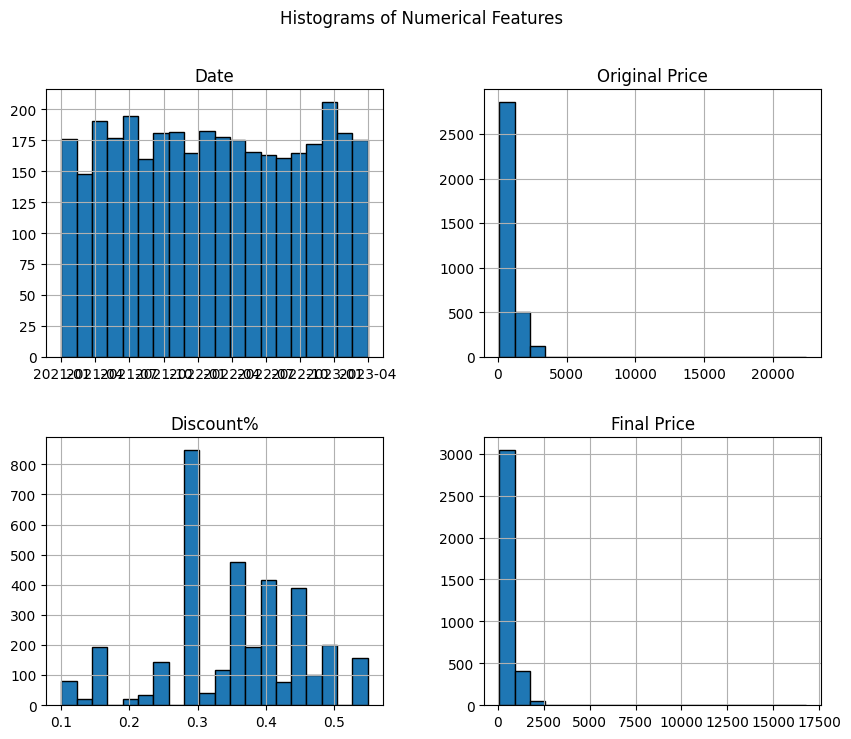

In [25]:
# Visualizing distribution of numerical columns
df.hist(figsize=(10, 8), bins=20, edgecolor='black')
plt.suptitle("Histograms of Numerical Features")
plt.show()

In [ ]:

# --------------------------------------
# 1. Histograms for all numerical features
# --------------------------------------
plt.figure(figsize=(12, 10))
df.hist(bins=20, edgecolor='black', figsize=(12, 10))
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()





# --------------------------------------
# 5. Pair Plot for a multivariate view of numerical features
# --------------------------------------
sns.pairplot(df[numerical_columns])
plt.suptitle("Pair Plot of Numerical Features", y=1.02, fontsize=16)
plt.show()

In [ ]:
# --------------------------------------
# 3. Count plots for categorical features
# --------------------------------------
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    plt.figure(figsize=(12, 6))
    order = df[col].value_counts().index
    sns.countplot(data=df, x=col, order=order, palette="viridis")
    plt.title(f"Count Plot of {col}", fontsize=14)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

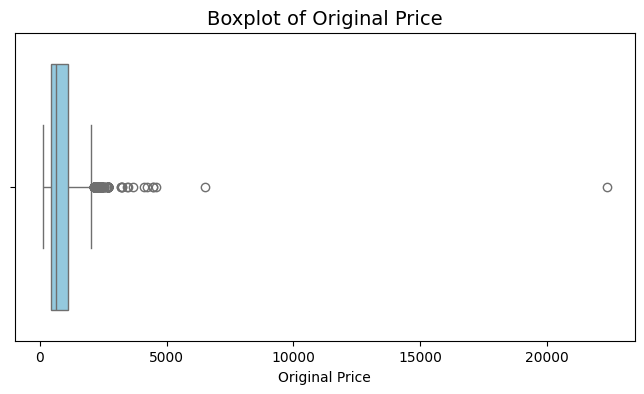

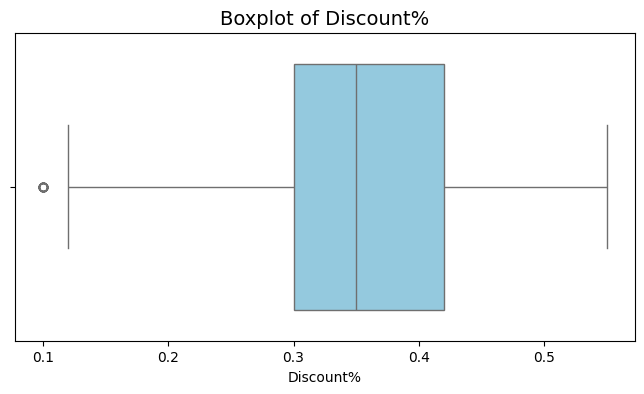

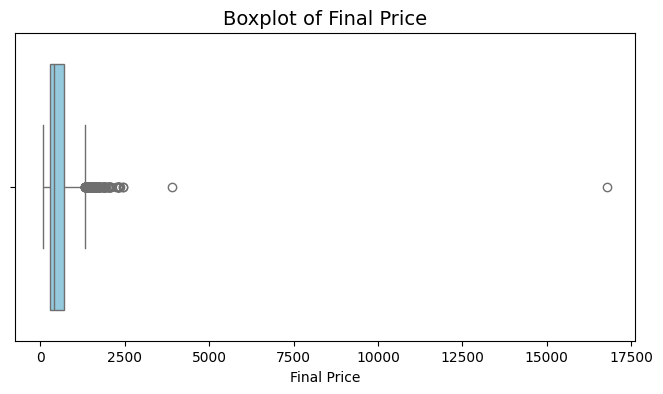

In [38]:
# --------------------------------------
# 2. Box plots for each numerical feature
# --------------------------------------
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=col, color='skyblue')
    plt.title(f"Boxplot of {col}", fontsize=14)
    plt.xlabel(col)
    plt.show()


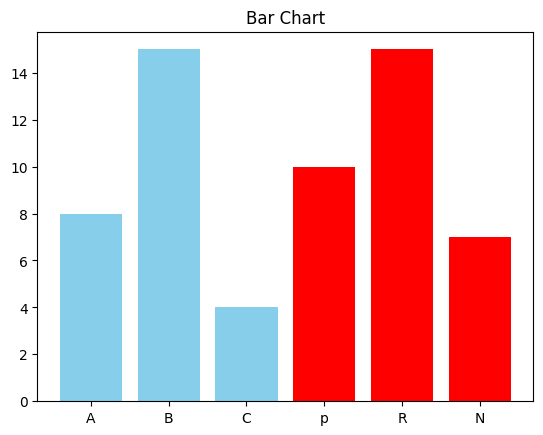

In [54]:
categories = ['A', 'B', 'C']
values = [8,15,4]
cate = ['p', 'R', 'N']
values1 = [10, 15, 7]

plt.bar(categories, values, color='skyblue')
plt.bar(cate, values1, color='Red')
plt.title("Bar Chart")
plt.show()

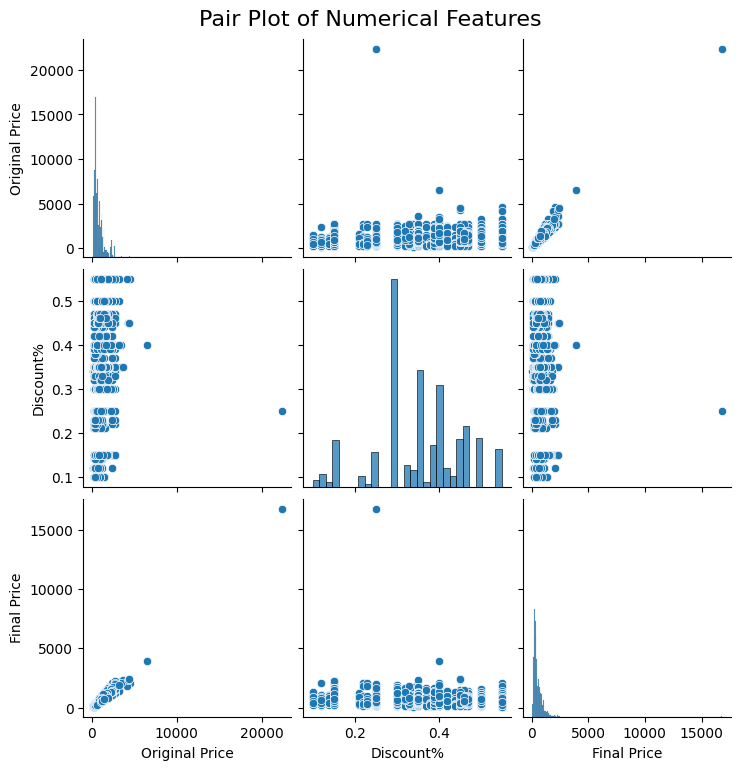

In [36]:
# --------------------------------------
# 5. Pair Plot for a multivariate view of numerical features
# --------------------------------------
sns.pairplot(df[numerical_columns])
plt.suptitle("Pair Plot of Numerical Features", y=1.02, fontsize=16)
plt.show()

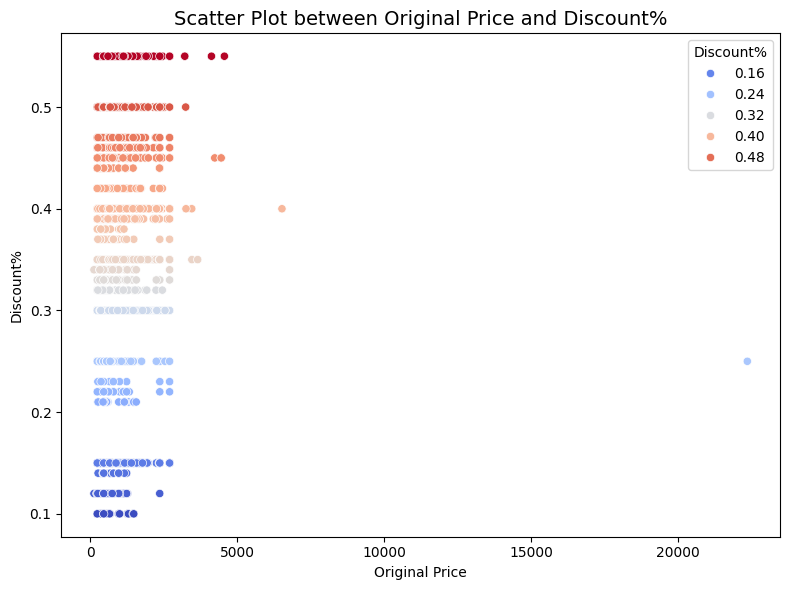

In [34]:
# --------------------------------------
# 6. Scatter Plot for a sample relationship
# (Using the first two numerical columns as an example)
# --------------------------------------
if len(numerical_columns) >= 2:
    x, y = numerical_columns[0], numerical_columns[1]
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=x, y=y, hue=y, palette="coolwarm")
    plt.title(f"Scatter Plot between {x} and {y}", fontsize=14)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.tight_layout()
    plt.show()